In [68]:

from sklearn.linear_model import LogisticRegression as LogRegression
from sklearn import linear_model as LinModel
from sklearn.model_selection import GridSearchCV
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from matplotlib import style

import joblib
from google.colab import files



In [28]:
Gender=pd.read_csv("/content/gender_submission.csv")
test_data=pd.read_csv("/content/test.csv")
train_data=pd.read_csv("/content/train.csv")

In [29]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [30]:
train_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [31]:
train_data.sample(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
562,563,0,2,"Norman, Mr. Robert Douglas",male,28.0,0,0,218629,13.5000,NaN,S
238,239,0,2,"Pengelly, Mr. Frederick William",male,19.0,0,0,28665,10.5000,NaN,S
519,520,0,3,"Pavlovic, Mr. Stefo",male,32.0,0,0,349242,7.8958,NaN,S
733,734,0,2,"Berriman, Mr. William John",male,23.0,0,0,28425,13.0000,NaN,S
827,828,1,2,"Mallet, Master. Andre",male,1.0,0,2,S.C./PARIS 2079,37.0042,NaN,C


In [32]:
train_data.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [33]:
train_data.columns.values


array(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'], dtype=object)

In [34]:
#Looking at the data to fix (tf)

Total_tf = train_data.isnull().sum().sort_values(ascending=False)
Percent_V1 = train_data.isnull().sum()/train_data.isnull().count()*100

Percent_V2 = (round(Percent_V1, 1)).sort_values(ascending=False)

data_to_fix = pd.concat([Total_tf, Percent_V2], axis=1, keys=['Total', 'Percentage'])
data_to_fix
data_to_fix.head(3)

,Total,Percentage
Cabin,687,77.1
Age,177,19.9
Embarked,2,0.2


In [35]:
train_data['Embarked'].describe()# to find the most common value, which is S


count     889
unique      3
top         S
freq      644
Name: Embarked, dtype: object

In [36]:
#DATA PREPROCESSING


#Missing Data



train_data = train_data.drop(['PassengerId'], axis=1) #not missing anything but useless for our purpose
train_data = train_data.drop(['Cabin'], axis=1)
train_data = train_data.drop(['Ticket'], axis=1)

test_data = test_data.drop(['PassengerId'], axis=1)
test_data = test_data.drop(['Cabin'], axis=1)
test_data = test_data.drop(['Ticket'], axis=1)


  #Age

tot_data= [train_data, test_data]

for dataset in tot_data:
    mean = train_data["Age"].mean()
    std = test_data["Age"].std()
    is_null = dataset["Age"].isnull().sum()
    rand_age = np.random.randint(0, 90)
    # fill NaN values in Age column with random values generated
    age_slice = dataset["Age"].copy()
    age_slice[np.isnan(age_slice)] = rand_age
    dataset["Age"] = age_slice
    dataset["Age"] = train_data["Age"].astype(int)
train_data["Age"].isnull().sum()

  #Embarked
for dataset in tot_data:
    dataset['Embarked'] = dataset['Embarked'].fillna('S')



port_of_embarkation = {"S": 0, "C": 1, "Q": 2}

for dataset in tot_data:
    dataset['Embarked'] = dataset['Embarked'].map(port_of_embarkation)

# Supprimer la colonne 'Embarked' si elle existe dans train_data
for dataset in tot_data:
    if 'Embarked' in dataset.columns:
        dataset.drop('Embarked', axis=1, inplace=True)


In [37]:
train_data

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare
0,0,3,"Braund, Mr. Owen Harris",male,22,1,0,7.2500
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,71.2833
2,1,3,"Heikkinen, Miss. Laina",female,26,0,0,7.9250
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,53.1000
4,0,3,"Allen, Mr. William Henry",male,35,0,0,8.0500
...,...,...,...,...,...,...,...,...
886,0,2,"Montvila, Rev. Juozas",male,27,0,0,13.0000
887,1,1,"Graham, Miss. Margaret Edith",female,19,0,0,30.0000
888,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,14,1,2,23.4500
889,1,1,"Behr, Mr. Karl Howell",male,26,0,0,30.0000


In [38]:
#DATA PREPROCESSING 2

  #Converting Features
  #Fare (converting it to integer)

for dataset in tot_data:
    dataset['Fare'] = dataset['Fare'].fillna(0)
    dataset['Fare'] = dataset['Fare'].astype(int)

  #Sex

genders = {"male": 0, "female": 1}
for dataset in tot_data:
    dataset['Sex'] = dataset['Sex'].map(genders)

  #Name

titles = {"Mr": 1, "Miss": 2, "Mrs": 3, "Master": 4, "Rare": 5}


for dataset in tot_data:
    # extract titles
    dataset['Title'] = dataset.Name.str.extract(' ([A-Za-z]+)\.', expand=False)
    # replace titles with a more common title or as Rare
    dataset['Title'] = dataset['Title'].replace(['Lady', 'Countess','Capt', 'Col','Don', 'Dr',\
                                            'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')
    dataset['Title'] = dataset['Title'].replace('Mlle', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Ms', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Mme', 'Mrs')
    # convert titles into numbers
    dataset['Title'] = dataset['Title'].map(titles)
    # filling NaN
    dataset['Title'] = dataset['Title'].fillna(0)

train_data = train_data.drop(['Name'], axis=1)
test_data = test_data.drop(['Name'], axis=1)





In [39]:
 #Age - Creating Close_Relatives category

for dataset in tot_data:
    dataset['Close_relatives'] = dataset['SibSp'] + dataset['Parch']
    dataset.loc[dataset['Close_relatives'] > 0, 'not_alone'] = 0
    dataset.loc[dataset['Close_relatives'] == 0, 'not_alone'] = 1
    dataset['not_alone'] = dataset['not_alone'].astype(int)




 #Age - Creating Age category

for dataset in tot_data:
    dataset['Age'] = dataset['Age'].astype(int)
    dataset.loc[ dataset['Age'] <= 11, 'Age'] = 0
    dataset.loc[(dataset['Age'] > 11) & (dataset['Age'] <= 18), 'Age'] = 1
    dataset.loc[(dataset['Age'] > 18) & (dataset['Age'] <= 22), 'Age'] = 2
    dataset.loc[(dataset['Age'] > 22) & (dataset['Age'] <= 27), 'Age'] = 3
    dataset.loc[(dataset['Age'] > 27) & (dataset['Age'] <= 33), 'Age'] = 4
    dataset.loc[(dataset['Age'] > 33) & (dataset['Age'] <= 40), 'Age'] = 5
    dataset.loc[(dataset['Age'] > 40) & (dataset['Age'] <= 66), 'Age'] = 6
    dataset.loc[ dataset['Age'] > 66, 'Age'] = 7

for dataset in tot_data:
    dataset['Age_Class']= dataset['Age']* dataset['Pclass']

#Fare

dataset['Fare'].fillna(dataset['Fare'].median(), inplace=True)


for dataset in tot_data:
    dataset.loc[ dataset['Fare'] <= 7.91, 'Fare'] = 0
    dataset.loc[(dataset['Fare'] > 7.91) & (dataset['Fare'] <= 14.454), 'Fare'] = 1
    dataset.loc[(dataset['Fare'] > 14.454) & (dataset['Fare'] <= 31), 'Fare']   = 2
    dataset.loc[(dataset['Fare'] > 31) & (dataset['Fare'] <= 99), 'Fare']   = 3
    dataset.loc[(dataset['Fare'] > 99) & (dataset['Fare'] <= 250), 'Fare']   = 4
    dataset.loc[ dataset['Fare'] > 250, 'Fare'] = 5
    dataset['Fare'] = dataset['Fare'].astype(int)


for dataset in tot_data:
    dataset['Fare_Per_Person'] = dataset['Fare']/(dataset['Close_relatives']+1)
    dataset['Fare_Per_Person'] = dataset['Fare_Per_Person'].astype(int)

In [40]:
print(dataset['Fare'].isnull().sum())


0


In [41]:
#Building Machine Learning Models


X_train = train_data.drop("Survived", axis=1)
Y_train = train_data["Survived"]
X_test  = test_data.copy()
Y_test = Gender["Survived"]




In [42]:
train_data


,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Title
0,0,3,0,22,1,0,7,1
1,1,1,1,38,1,0,71,3
2,1,3,1,26,0,0,7,2
3,1,1,1,35,1,0,53,3
4,0,3,0,35,0,0,8,1
...,...,...,...,...,...,...,...,...
886,0,2,0,27,0,0,13,5
887,1,1,1,19,0,0,30,2
888,0,3,1,14,1,2,23,2
889,1,1,0,26,0,0,30,1


In [43]:
#Logistic Regression:


logreg = LogRegression(max_iter=10000)
logreg.fit(X_train, Y_train)

Y_pred = logreg.predict(X_test)

acc_log = round(logreg.score(X_train, Y_train) * 100, 2)

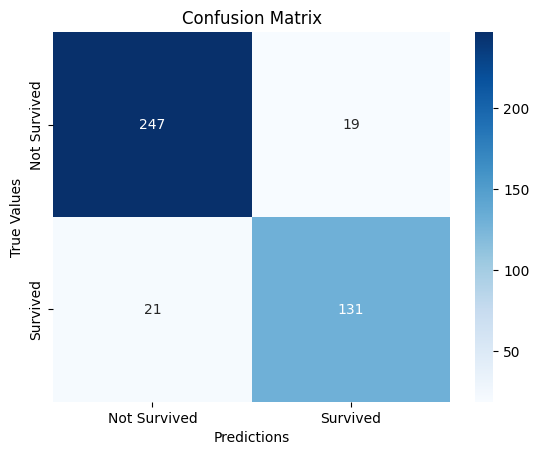

Accuracy: 0.9043062200956937
              precision    recall  f1-score   support

           0       0.92      0.93      0.93       266
           1       0.87      0.86      0.87       152

    accuracy                           0.90       418
   macro avg       0.90      0.90      0.90       418
weighted avg       0.90      0.90      0.90       418



In [44]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score


# Prediction on the validation sample
Y_pred_val = logreg.predict(X_test)


# Display Confusion Matrix
conf_matrix = confusion_matrix(Y_test, Y_pred_val)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Survived', 'Survived'], yticklabels=['Not Survived', 'Survived'])
plt.xlabel('Predictions')
plt.ylabel('True Values')
plt.title('Confusion Matrix')
plt.show()


#Display model's accuracy

accuracy = accuracy_score(Y_test, Y_pred_val)
print(f'Accuracy: {accuracy}')

# Display classification report
class_report = classification_report(Y_test, Y_pred_val)
print(class_report)


In [45]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(logreg, X_train, Y_train, cv=5)  # cv represents the fold number

# Printing cross validation score
print("Cross-validation scores:", scores)
print("Mean accuracy:", scores.mean())


Cross-validation scores: [0.81005587 0.78651685 0.78089888 0.80898876 0.82022472]
Mean accuracy: 0.8013370158809867


In [46]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression

# Define the grid of hyperparameters to test
param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
    'penalty': ['l2'],
    'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']

}

# Create a GridSearchCV object
grid_search = GridSearchCV(LogisticRegression(max_iter=10000), param_grid, cv=5)

# Execute the search on the grid
grid_search.fit(X_train, Y_train)

# Display the best parameters found
print("Best parameters:", grid_search.best_params_)


Best parameters: {'C': 1, 'penalty': 'l2', 'solver': 'saga'}


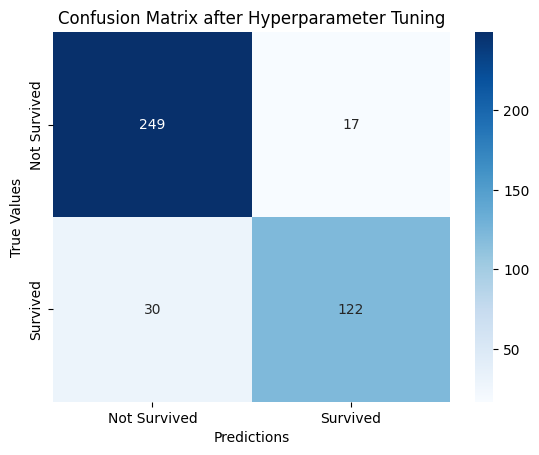

Accuracy: 0.8875598086124402
Classification Report after Hyperparameter Tuning:
               precision    recall  f1-score   support

           0       0.89      0.94      0.91       266
           1       0.88      0.80      0.84       152

    accuracy                           0.89       418
   macro avg       0.89      0.87      0.88       418
weighted avg       0.89      0.89      0.89       418



In [47]:
# Use the best parameters found by GridSearchCV
best_params = grid_search.best_params_
best_logreg = LogisticRegression(max_iter=10000, C=best_params['C'], penalty=best_params['penalty'], solver=best_params['solver'])


# Train the model on the training set
best_logreg.fit(X_train, Y_train)
# Predict on the validation set
Y_pred_val_best = best_logreg.predict(X_test)

# Display the confusion matrix
conf_matrix_best = confusion_matrix(Y_test, Y_pred_val_best)
sns.heatmap(conf_matrix_best, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Survived', 'Survived'], yticklabels=['Not Survived', 'Survived'])
plt.xlabel('Predictions')
plt.ylabel('True Values')
plt.title('Confusion Matrix after Hyperparameter Tuning')
plt.show()

# Display accuracy
accuracy = accuracy_score(Y_test, Y_pred_val_best)
print(f'Accuracy: {accuracy}')

# Display the classification report
class_report_best = classification_report(Y_test, Y_pred_val_best)
print("Classification Report after Hyperparameter Tuning:\n", class_report_best)


In [48]:
#RandomForest try
from sklearn.ensemble import RandomForestClassifier


modelRF = RandomForestClassifier(n_estimators=100)
modelRF.fit(X_train, Y_train)


Y_prediction = modelRF.predict(X_test)

modelRF.score(X_train, Y_train)
acc_random_forest = round(modelRF.score(X_train, Y_train) * 100, 2)


y_predRF = modelRF.predict(X_test)
reportRF = classification_report(Y_test, y_predRF)


print(f"Accuracy: {acc_random_forest:.2f}")
print("\nClassification Report:\n", reportRF)

Accuracy: 95.96

Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.83      0.83       266
           1       0.71      0.70      0.71       152

    accuracy                           0.79       418
   macro avg       0.77      0.77      0.77       418
weighted avg       0.79      0.79      0.79       418



Accuracy: 90.35

Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.89      0.87       266
           1       0.80      0.72      0.76       152

    accuracy                           0.83       418
   macro avg       0.82      0.81      0.82       418
weighted avg       0.83      0.83      0.83       418


Best Parameters: {'max_depth': 10, 'min_samples_split': 5, 'n_estimators': 15}


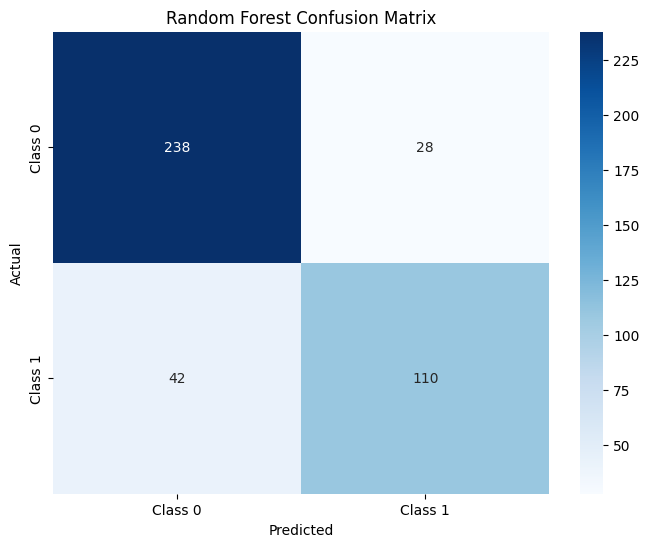

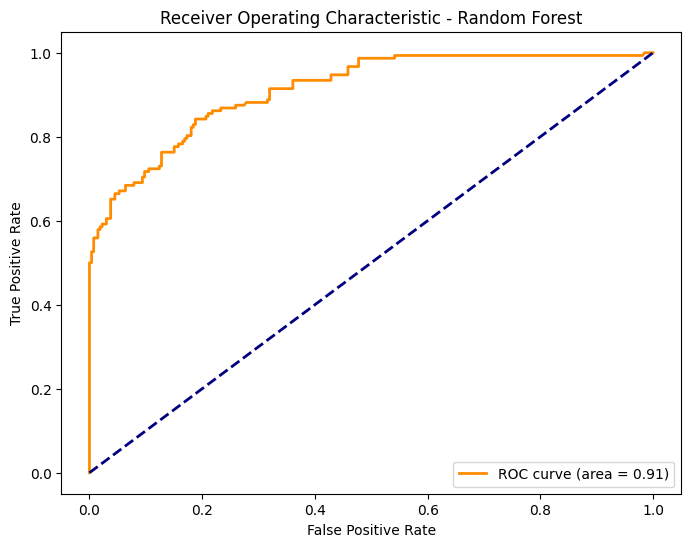

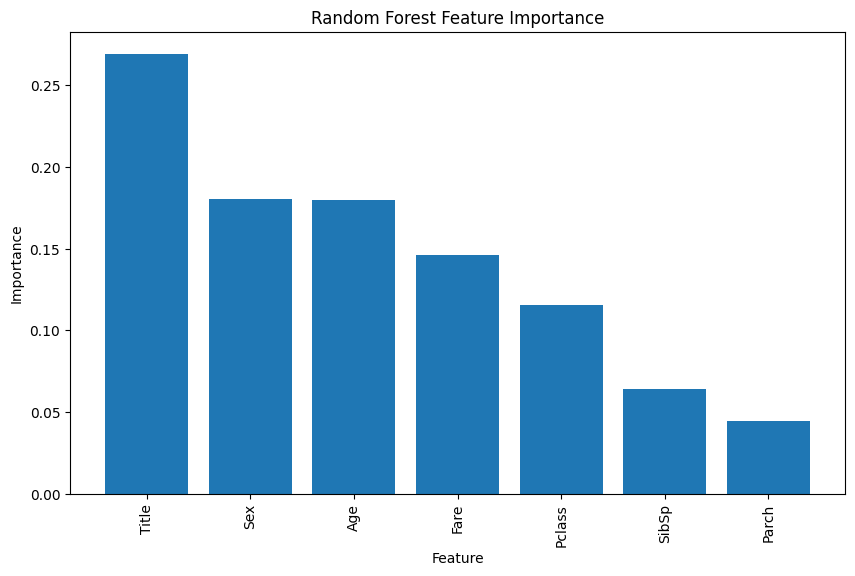

In [59]:
param_grid = {
    'n_estimators': [10, 15,20,25,30, 50, 100],

    'max_depth': [None, 10, 20, 30],

    'min_samples_split': [2, 5, 10],
}

modelRF = RandomForestClassifier()

grid_search = GridSearchCV(modelRF, param_grid, cv=5, scoring='accuracy')

grid_search.fit(X_train, Y_train)

best_RF_model = grid_search.best_estimator_

best_RF_model.fit(X_train, Y_train)

y_predRF = best_RF_model.predict(X_test)

reportRF = classification_report(Y_test, y_predRF)

acc_random_forest = round(best_RF_model.score(X_train, Y_train) * 100, 2)
print(f"Accuracy: {acc_random_forest:.2f}")

print("\nClassification Report:\n", reportRF)

print("\nBest Parameters:", grid_search.best_params_)



Accuracy: 93.71

Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.88      0.86       266
           1       0.77      0.74      0.75       152

    accuracy                           0.83       418
   macro avg       0.81      0.81      0.81       418
weighted avg       0.82      0.83      0.82       418


Best Parameters: {'max_depth': 10, 'n_estimators': 30}
Cross-Validation Scores: [0.78125    0.8203125  0.82677165 0.87401575 0.87401575 0.82677165
 0.85826772]
Mean CV Accuracy: 0.8373435742407199


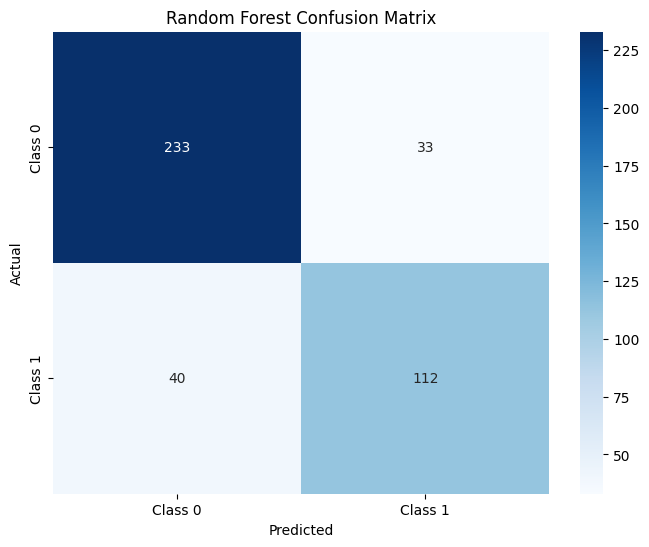

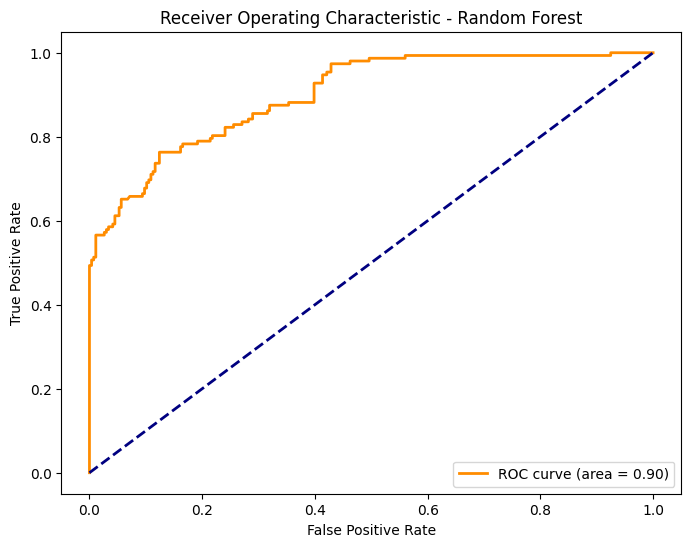

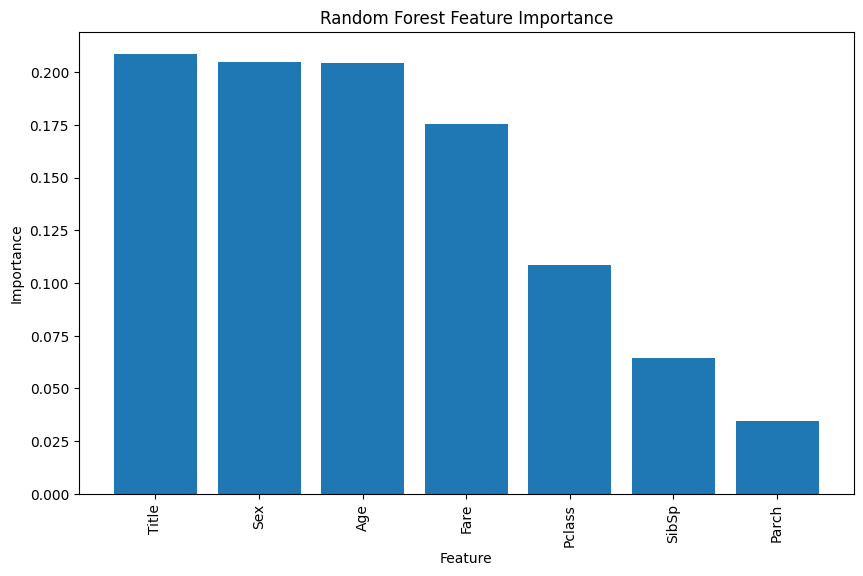

In [62]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score

param_grid = {
    'n_estimators': [10, 15, 20, 25, 30, 35, 40, 45, 50, 75, 100],
    'max_depth': [None, 10, 20, 30],
}

modelRF = RandomForestClassifier()

grid_search = GridSearchCV(modelRF, param_grid, cv=5, scoring='accuracy')

grid_search.fit(X_train, Y_train)

best_RF_model = grid_search.best_estimator_

best_RF_model.fit(X_train, Y_train)

y_predRF = best_RF_model.predict(X_test)

reportRF = classification_report(Y_test, y_predRF)

acc_random_forest = round(best_RF_model.score(X_train, Y_train) * 100, 2)
print(f"Accuracy: {acc_random_forest:.2f}")

print("\nClassification Report:\n", reportRF)

print("\nBest Parameters:", grid_search.best_params_)

cv_scores = cross_val_score(best_RF_model, X_train, Y_train, cv=7)
print("Cross-Validation Scores:", cv_scores)
print("Mean CV Accuracy:", cv_scores.mean())

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Save the SVM model
joblib.dump(best_RF_model, 'best_svm_model.pkl')

# Upload the saved model to GitHub
files.download('best_svm_model.pkl')

# Confusion Matrix
conf_matrix_RF = confusion_matrix(Y_test, y_predRF)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_RF, annot=True, fmt="d", cmap="Blues", xticklabels=["Class 0", "Class 1"], yticklabels=["Class 0", "Class 1"])
plt.title("Random Forest Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# ROC curve (Receiver Operating Characteristic)
from sklearn.metrics import roc_curve, auc

fpr, tpr, thresholds = roc_curve(Y_test, best_RF_model.predict_proba(X_test)[:, 1])
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic - Random Forest')
plt.legend(loc="lower right")
plt.show()

# Features importance
feature_importances = best_RF_model.feature_importances_
features = X_train.columns
indices = sorted(range(len(feature_importances)), key=lambda k: feature_importances[k], reverse=True)

plt.figure(figsize=(10, 6))
plt.bar(range(len(feature_importances)), feature_importances[indices], align="center")
plt.xticks(range(len(feature_importances)), [features[i] for i in indices], rotation='vertical')
plt.title("Random Forest Feature Importance")
plt.xlabel("Feature")
plt.ylabel("Importance")
plt.show()


In [51]:
# Définir les hyperparamètres à tester
param_grid = {
    'n_estimators': [10, 15,20,25,30, 50, 100],
    'max_depth': [None, 10, 20, 30],  # Profondeur maximale des arbres
    'min_samples_split': [2, 5, 10],  # Nombre minimal d'échantillons requis pour diviser un nœud
    'min_samples_leaf': [1, 2, 4]  # Nombre minimal d'échantillons requis à chaque feuille
}

# Initialiser le modèle RandomForest
modelRF = RandomForestClassifier()

# Initialiser GridSearchCV avec le modèle, les hyperparamètres et la validation croisée (par exemple, 5 plis)
grid_search = GridSearchCV(modelRF, param_grid, cv=5, scoring='accuracy')

# Exécuter la recherche sur la grille sur les données d'entraînement
grid_search.fit(X_train, Y_train)

# Utiliser les meilleurs paramètres trouvés
best_RF_model = grid_search.best_estimator_

# Fitter le modèle avec les meilleurs paramètres sur les données d'entraînement
best_RF_model.fit(X_train, Y_train)

# Faire des prédictions sur les données de test
y_predRF = best_RF_model.predict(X_test)

# Afficher le rapport de classification
reportRF = classification_report(Y_test, y_predRF)

# Afficher la précision du modèle
acc_random_forest = round(best_RF_model.score(X_train, Y_train) * 100, 2)
print(f"Accuracy: {acc_random_forest:.2f}")

# Afficher le rapport de classification
print("\nClassification Report:\n", reportRF)

# Afficher les meilleurs paramètres trouvés
print("\nBest Parameters:", grid_search.best_params_)


Accuracy: 90.24

Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.89      0.87       266
           1       0.79      0.73      0.76       152

    accuracy                           0.83       418
   macro avg       0.82      0.81      0.82       418
weighted avg       0.83      0.83      0.83       418


Best Parameters: {'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 30}


In [54]:
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

param_grid = {
    'n_estimators': [10, 15,20,25,30, 35, 40, 45, 50, 75, 100],
    'max_depth': [None, 10, 20, 30],
}

modelRF = RandomForestClassifier()

grid_search = GridSearchCV(modelRF, param_grid, cv=5, scoring='accuracy')

grid_search.fit(X_train, Y_train)

best_RF_model = grid_search.best_estimator_

cv_scores = cross_val_score(best_RF_model, X_train, Y_train, cv=5)
print("Cross-Validation Scores:", cv_scores)
print("Mean CV Accuracy:", cv_scores.mean())

y_predRF = best_RF_model.predict(X_test)

reportRF = classification_report(Y_test, y_predRF)

acc_random_forest = round(best_RF_model.score(X_test, Y_test) * 100, 2)
print(f"Accuracy on Test Set: {acc_random_forest:.2f}")

print("\nClassification Report:\n", reportRF)
print("\nBest Parameters:", grid_search.best_params_)



Cross-Validation Scores: [0.79888268 0.79213483 0.87640449 0.80898876 0.80898876]
Mean CV Accuracy: 0.8170799070993662
Accuracy on Test Set: 81.34

Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.85      0.85       266
           1       0.74      0.75      0.75       152

    accuracy                           0.81       418
   macro avg       0.80      0.80      0.80       418
weighted avg       0.81      0.81      0.81       418


Best Parameters: {'max_depth': 10, 'n_estimators': 15}


Accuracy: 89.11

Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.91      0.88       266
           1       0.82      0.72      0.76       152

    accuracy                           0.84       418
   macro avg       0.83      0.81      0.82       418
weighted avg       0.84      0.84      0.84       418


Best Parameters: {'criterion': 'entropy', 'min_samples_leaf': 1, 'min_samples_split': 16, 'n_estimators': 100}
Cross-Validation Scores: [0.78125    0.8203125  0.8503937  0.8503937  0.85826772 0.80314961
 0.85826772]
Mean CV Accuracy: 0.8317192772778405


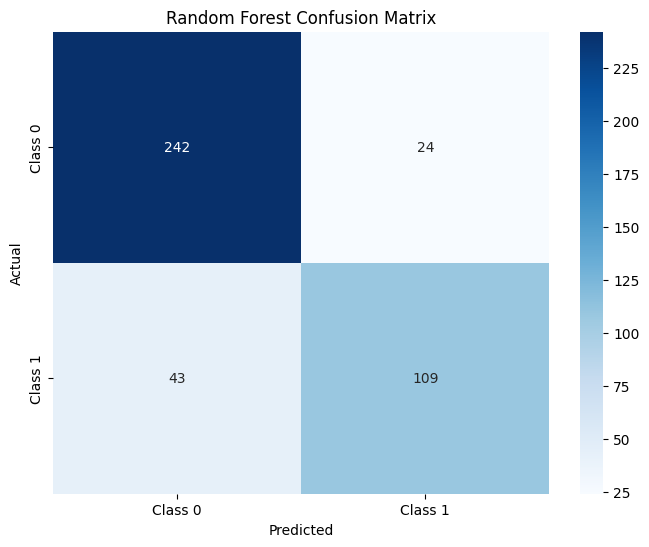

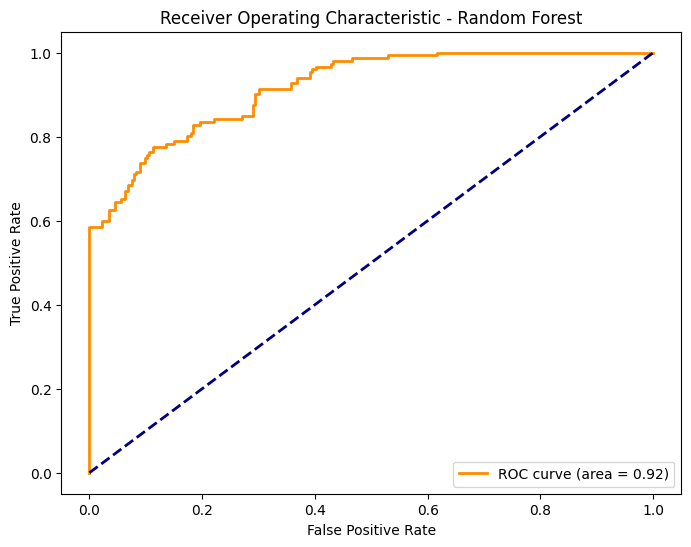

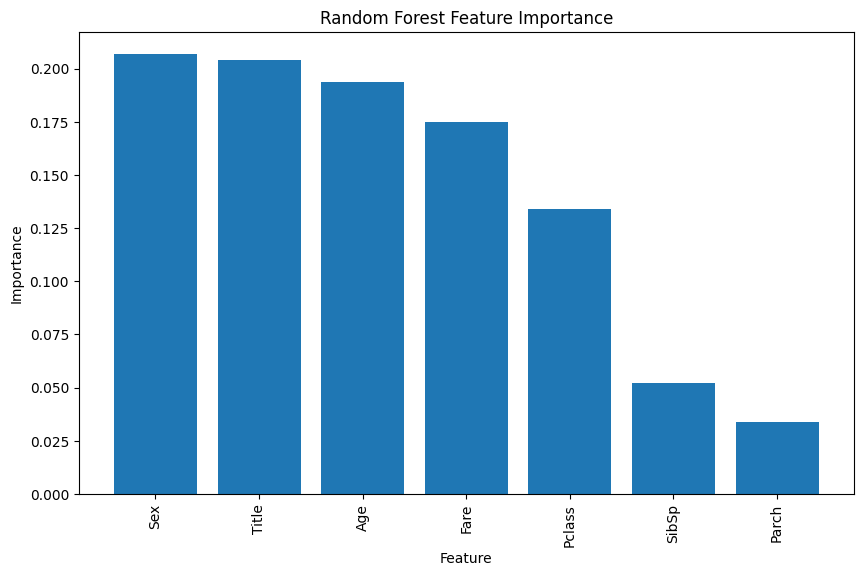

In [64]:
"""from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score

param_grid = {
    'n_estimators': [10, 15, 20, 25, 30, 35, 40, 45, 50, 75, 100],
    'max_depth': [None, 10, 20, 30],
}



param_grid = { "criterion" : ["gini", "entropy"], "min_samples_leaf" : [1, 5, 10, 25, 50, 70], "min_samples_split" : [2, 4, 10, 12, 16, 18, 25, 35], "n_estimators": [100, 400, 700, 1000, 1500]}


modelRF = RandomForestClassifier()

grid_search = GridSearchCV(modelRF, param_grid, cv=5, scoring='accuracy')

grid_search.fit(X_train, Y_train)

best_RF_model = grid_search.best_estimator_

best_RF_model.fit(X_train, Y_train)

y_predRF = best_RF_model.predict(X_test)

reportRF = classification_report(Y_test, y_predRF)

acc_random_forest = round(best_RF_model.score(X_train, Y_train) * 100, 2)
print(f"Accuracy: {acc_random_forest:.2f}")

print("\nClassification Report:\n", reportRF)

print("\nBest Parameters:", grid_search.best_params_)

cv_scores = cross_val_score(best_RF_model, X_train, Y_train, cv=7)
print("Cross-Validation Scores:", cv_scores)
print("Mean CV Accuracy:", cv_scores.mean())

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Confusion Matrix
conf_matrix_RF = confusion_matrix(Y_test, y_predRF)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_RF, annot=True, fmt="d", cmap="Blues", xticklabels=["Class 0", "Class 1"], yticklabels=["Class 0", "Class 1"])
plt.title("Random Forest Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# ROC curve (Receiver Operating Characteristic)
from sklearn.metrics import roc_curve, auc

fpr, tpr, thresholds = roc_curve(Y_test, best_RF_model.predict_proba(X_test)[:, 1])
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic - Random Forest')
plt.legend(loc="lower right")
plt.show()

# Features importance
feature_importances = best_RF_model.feature_importances_
features = X_train.columns
indices = sorted(range(len(feature_importances)), key=lambda k: feature_importances[k], reverse=True)

plt.figure(figsize=(10, 6))
plt.bar(range(len(feature_importances)), feature_importances[indices], align="center")
plt.xticks(range(len(feature_importances)), [features[i] for i in indices], rotation='vertical')
plt.title("Random Forest Feature Importance")
plt.xlabel("Feature")
plt.ylabel("Importance")
plt.show()"""


Accuracy: 93.83

Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.87      0.86       266
           1       0.76      0.74      0.75       152

    accuracy                           0.82       418
   macro avg       0.81      0.81      0.81       418
weighted avg       0.82      0.82      0.82       418


Best Parameters: {'criterion': 'gini', 'max_depth': 10, 'n_estimators': 100}
Cross-Validation Scores: [0.78125    0.828125   0.84251969 0.85826772 0.8503937  0.81889764
 0.8503937 ]
Mean CV Accuracy: 0.8328353487064117


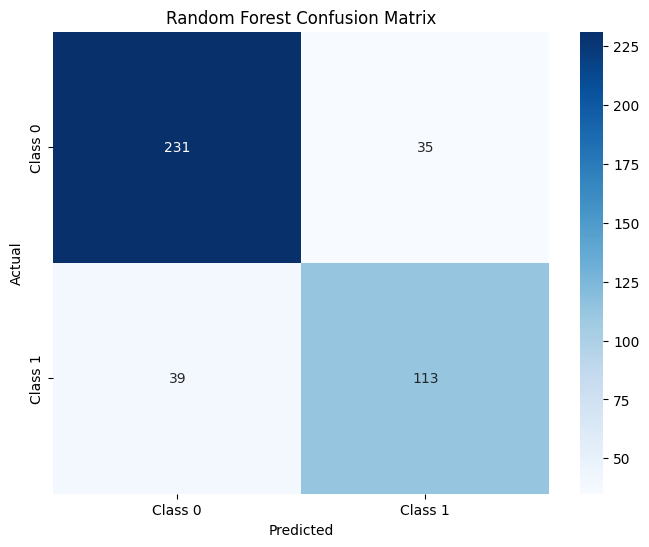

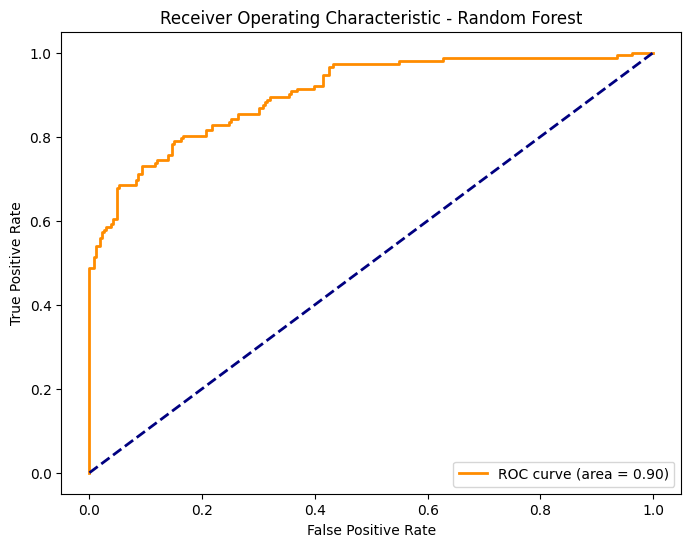

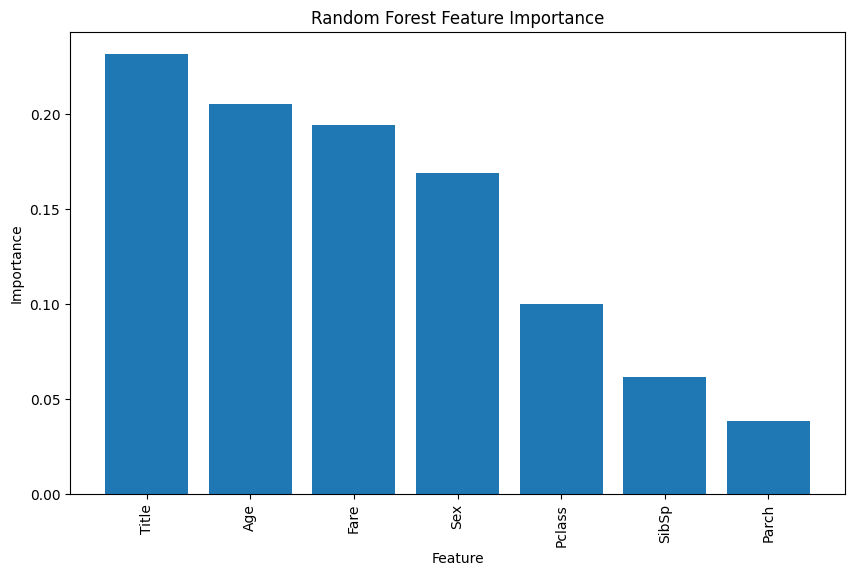

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [69]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score


param_grid = {
    "criterion" : ["gini", "entropy"],
    'n_estimators': [10, 15, 20, 25, 30, 35, 40, 45, 50, 75, 100],
    'max_depth': [None, 10, 20, 30],}


modelRF = RandomForestClassifier()

grid_search = GridSearchCV(modelRF, param_grid, cv=5, scoring='accuracy')

grid_search.fit(X_train, Y_train)

best_RF_model = grid_search.best_estimator_

best_RF_model.fit(X_train, Y_train)

y_predRF = best_RF_model.predict(X_test)

reportRF = classification_report(Y_test, y_predRF)

acc_random_forest = round(best_RF_model.score(X_train, Y_train) * 100, 2)
print(f"Accuracy: {acc_random_forest:.2f}")

print("\nClassification Report:\n", reportRF)

print("\nBest Parameters:", grid_search.best_params_)

cv_scores = cross_val_score(best_RF_model, X_train, Y_train, cv=7)
print("Cross-Validation Scores:", cv_scores)
print("Mean CV Accuracy:", cv_scores.mean())

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Confusion Matrix
conf_matrix_RF = confusion_matrix(Y_test, y_predRF)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_RF, annot=True, fmt="d", cmap="Blues", xticklabels=["Class 0", "Class 1"], yticklabels=["Class 0", "Class 1"])
plt.title("Random Forest Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# ROC curve (Receiver Operating Characteristic)
from sklearn.metrics import roc_curve, auc

fpr, tpr, thresholds = roc_curve(Y_test, best_RF_model.predict_proba(X_test)[:, 1])
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic - Random Forest')
plt.legend(loc="lower right")
plt.show()

# Features importance
feature_importances = best_RF_model.feature_importances_
features = X_train.columns
indices = sorted(range(len(feature_importances)), key=lambda k: feature_importances[k], reverse=True)

plt.figure(figsize=(10, 6))
plt.bar(range(len(feature_importances)), feature_importances[indices], align="center")
plt.xticks(range(len(feature_importances)), [features[i] for i in indices], rotation='vertical')
plt.title("Random Forest Feature Importance")
plt.xlabel("Feature")
plt.ylabel("Importance")
plt.show()



# Save the SVM model
joblib.dump(best_RF_model, 'best_svm_model.pkl')

# Upload the saved model to GitHub
files.download('best_svm_model.pkl')